In [1]:
from torch.nn.functional import avg_pool2d, max_pool2d
import torch
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(42)

In [2]:
def show_weight(weight, title="", show_values=True, 
                x_labels=None, y_labels=None):
    data = weight.detach().numpy()
    fig, ax = plt.subplots()
        
    im = ax.imshow(data)
    
    if x_labels is not None:
        ax.set_xticks(np.arange(len(x_labels)))
        ax.set_xticklabels(x_labels)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")
    else:
        ax.xaxis.set_visible(False)

    if y_labels is not None:
        ax.set_yticks(np.arange(len(y_labels)))
        ax.set_yticklabels(y_labels)
    else:
        ax.yaxis.set_visible(False)

    if show_values:
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                text = ax.text(j, i, f"{data[i, j]:0.1f}",
                               ha="center", va="center", color="w")
    ax.set_title(title)
    fig.tight_layout()
    plt.show()


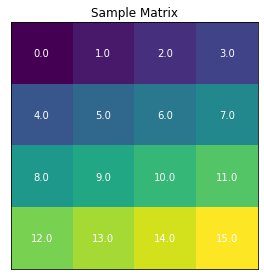

In [3]:
size = 4
sample = torch.arange(0, size*size, dtype=torch.float64).reshape(size, size)
show_weight(sample, "Sample Matrix")

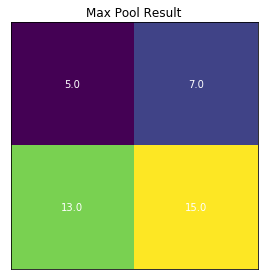

In [4]:
# Max Pooling 

reshaped_input = sample.unsqueeze(0).unsqueeze(0)
max_pooling_result = max_pool2d(reshaped_input, 2, 2)
show_weight(max_pooling_result[0][0], "Max Pool Result")

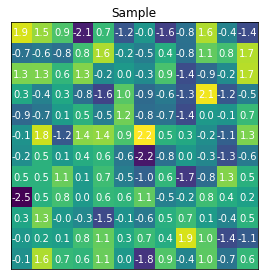

In [5]:
size = 12
sample = torch.randn(size, size)
show_weight(sample, "Sample")

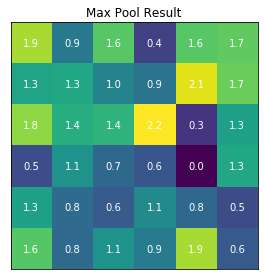

In [6]:
reshaped_input = sample.unsqueeze(0).unsqueeze(0)
max_pooling_result = max_pool2d(reshaped_input, 2, 2)
show_weight(max_pooling_result[0][0], "Max Pool Result")

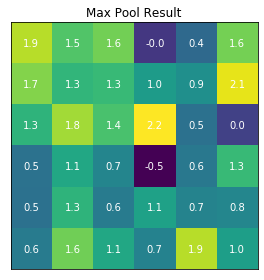

In [12]:
shift = 1
reshaped_input = torch.roll(sample, 
                            shift, dims=1).unsqueeze(0).unsqueeze(0)
max_pooling_result = max_pool2d(reshaped_input, 2, 2)
show_weight(max_pooling_result[0][0], "Max Pool Result")

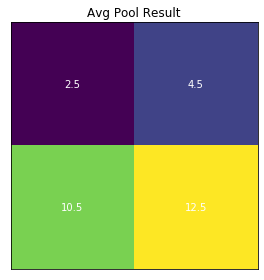

In [17]:
size = 4
sample = torch.arange(0, size*size, dtype=torch.float64).reshape(size, size)
reshaped_input = sample.unsqueeze(0).unsqueeze(0)
avg_pooling_result = avg_pool2d(reshaped_input, 2, 2)
show_weight(avg_pooling_result[0][0], "Avg Pool Result")